# Stock Portfolio Optimization with Particle Swarm Optimizer
*Author:* **Daniel Carpenter**  


## Overview of Code
1. Inputs for model:
    * Stock tickers from publically traded companies, investment funds, etc. available on Yahoo Finance 
    * Date range of Stocks to include in sample (Default last 10 years)
    * Minimum desired return on portfolio as a soft constraint
    * Some Metaheuristic inputs   
    
2. `StockFinanceMPT.py`: Calls `PullStockData.py` to pull stock data, then prepares stock data to get excess returns, variance-covariance matrix, etc. for **Modern Porfolio Theory**. *Must be in working directory*

3. `SimulateOptimalPortfolios.py`: 
    * Runs individual Particle Swarm Optimization routine, searching for the global minimum risk. Specifically, it creates many `OptimizePortfolioPSO` class objects.
    * Repeatedly simulate PSO modeling as desired.
    * Returns optimal allocation of weights to invest into stocks and associated investment weights.

    
4.  `ViewSimulatedPortfolios.py`: Class that processes results of the simulations, which yields the following performance plots:
    * Displays variance characteristics across all simulations.
    * Across all simulations, plots:
        * Global minimum risk portfolio and maximum Sharpe portfolios against all non-optimal portfolios.
        * Global minimum risk portfolio and maximum Sharpe portfolios against all investable tickers, or funds.
    * Frontier of all simulated portfolios. I.e., risk vs. return of all simulated portfolios.

6. Exports CSVs of inputs, performance data, weights, etc.

## Primary Packages

In [1]:
import datetime                  as dt  # For dates
import StockFinanceMPT           as mpt # Stock pull from yfinance in current wrkdir
import SimulateOptimalPortfolios as sop # Run simulations of global best portfolios
import ViewSimulatedPortfolios   as vsp # Wrapper class to plot, export, etc., simulations

## Stock Pull

In [2]:
# List of stock tickers to pull data
StockTickers = ['NVDA', 'MSFT', 'AAPL', 'AMZN', 'META', 
                'AVGO', 'GOOGL', 'GOOG', 'TSLA','JPM', 
                'WMT', 'V', 'LLY', 'ORCL', 'MA', 'NFLX', 
                'XOM', 'JNJ', 'COST', 'HD', 'BAC'
]

# Date range for stock & t-bill data pull - default last 10 years
maxDate = dt.datetime.today()                    # Max date to pull from
minDate = maxDate - dt.timedelta(days = 15*365) # Min date to pull from

# Pull stock data
PulledStockData = mpt.StockFinanceMPT(StockTickers, minDate, maxDate)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  21 of 21 completed
[*********************100%***********************]  1 of 1 completed


## Run Simulations

In [3]:
# Create the simulation
simulatedPortfolios = sop.SimulateOptimalPortfolios(    
    PulledStockData,               # Using the pulled stock data above
    totalSimulations    = 1500,    # Number of min risk portfolio's to simulate
    totalIterations     = 15,      # Total number of iterations (or movements within one simulation)
    numPorfolios        = 25,      # Total number of portfolios in a swarm. 
    minDesiredReturn    = 0.07     # Targeted expected return, soft constraint
    )

simulatedPortfolios.runSimulation() # Run the simulation given parameters above


## View Results

### Create viewer wrapper class

In [4]:
# Create the viewer wrapper class
simulationViewer = vsp.ViewSimulatedPortfolios(simulatedPortfolios)

# Note you can view all plots and export data like this, or... (see below chunk)
# simulationViewer.processAllOutputAtOnce()


Minimum Risk Portfolio over all Simulations ----- 
Risk:		9.2%  
Return:		19.3%  
Sharpe:		1.987 
Num. Tickers:   11 

Optimal Weights:
 Ticker
NVDA     0.02
MSFT     0.09
AAPL     0.00
AMZN     0.05
META     0.00
AVGO     0.00
GOOGL    0.00
GOOG     0.01
TSLA     0.14
JPM      0.00
WMT      0.09
V        0.10
LLY      0.00
ORCL     0.06
MA       0.00
NFLX     0.00
XOM      0.00
JNJ      0.00
COST     0.11
HD       0.15
BAC      0.18
Name: Simulation_1370, dtype: float64 
Column Index of Optimal Weights: 1370

Maximum Sharpe Portfolio over all Simulations ----- 
Risk:		10.8%  
Return:		23.6%  
Sharpe:		2.075 
Num. Tickers:   16 

Optimal Weights:
 Ticker
NVDA     0.07
MSFT     0.04
AAPL     0.08
AMZN     0.00
META     0.07
AVGO     0.01
GOOGL    0.04
GOOG     0.08
TSLA     0.04
JPM      0.02
WMT      0.04
V        0.10
LLY      0.00
ORCL     0.11
MA       0.00
NFLX     0.00
XOM      0.03
JNJ      0.00
COST     0.09
HD       0.04
BAC      0.14
Name: Simulation_902, dtype: float64 
Colu

### Check that Constraints were met

In [5]:
# Or view each individually
simulationViewer.checkSumOfWeights()

Max Sum of Weights	 1.0000000000000004
Min Sum of Weights	 0.9999999999999996

Min investment in each stock
 Ticker
NVDA     0.0
MSFT     0.0
AAPL     0.0
AMZN     0.0
META     0.0
AVGO     0.0
GOOGL    0.0
GOOG     0.0
TSLA     0.0
JPM      0.0
WMT      0.0
V        0.0
LLY      0.0
ORCL     0.0
MA       0.0
NFLX     0.0
XOM      0.0
JNJ      0.0
COST     0.0
HD       0.0
BAC      0.0
dtype: float64

Max investment in each stock
 Ticker
NVDA     0.16
MSFT     0.20
AAPL     0.16
AMZN     0.18
META     0.17
AVGO     0.20
GOOGL    0.14
GOOG     0.20
TSLA     0.23
JPM      0.15
WMT      0.20
V        0.22
LLY      0.15
ORCL     0.18
MA       0.13
NFLX     0.12
XOM      0.16
JNJ      0.09
COST     0.21
HD       0.20
BAC      0.21
dtype: float64


### View Variability across all Simulated Portfolios

In [6]:
# simulationViewer.plotPortfolioVarianceStats(figHeight=7, figWidth=5)

### Max. Sharpe and Min Risk Portfolios
> These portfolios were identified across all simulated portfolios

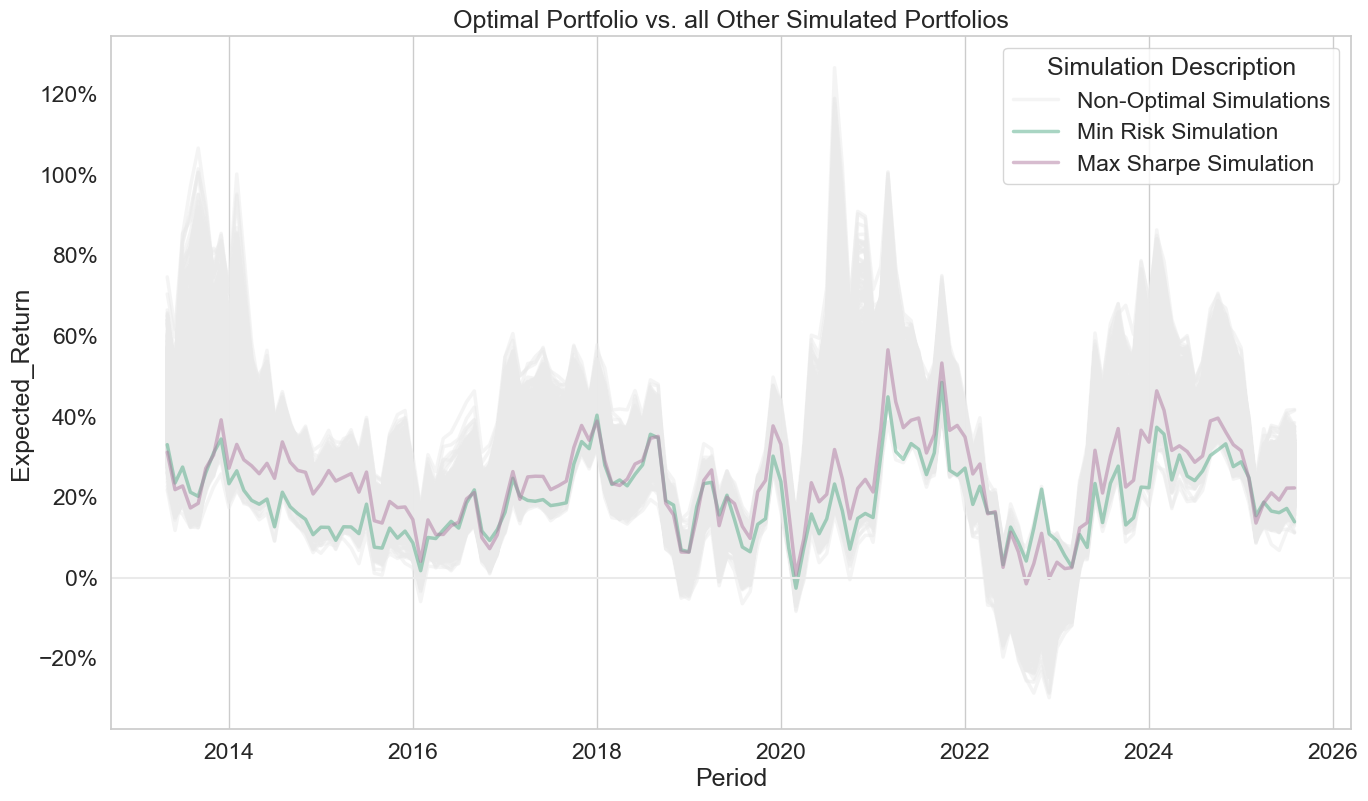

In [7]:
simulationViewer.plotOptimalVsNonOptSimulations()

### Max. Sharpe and Min Risk Portfolios vs. Realized Returns of Investible Funds


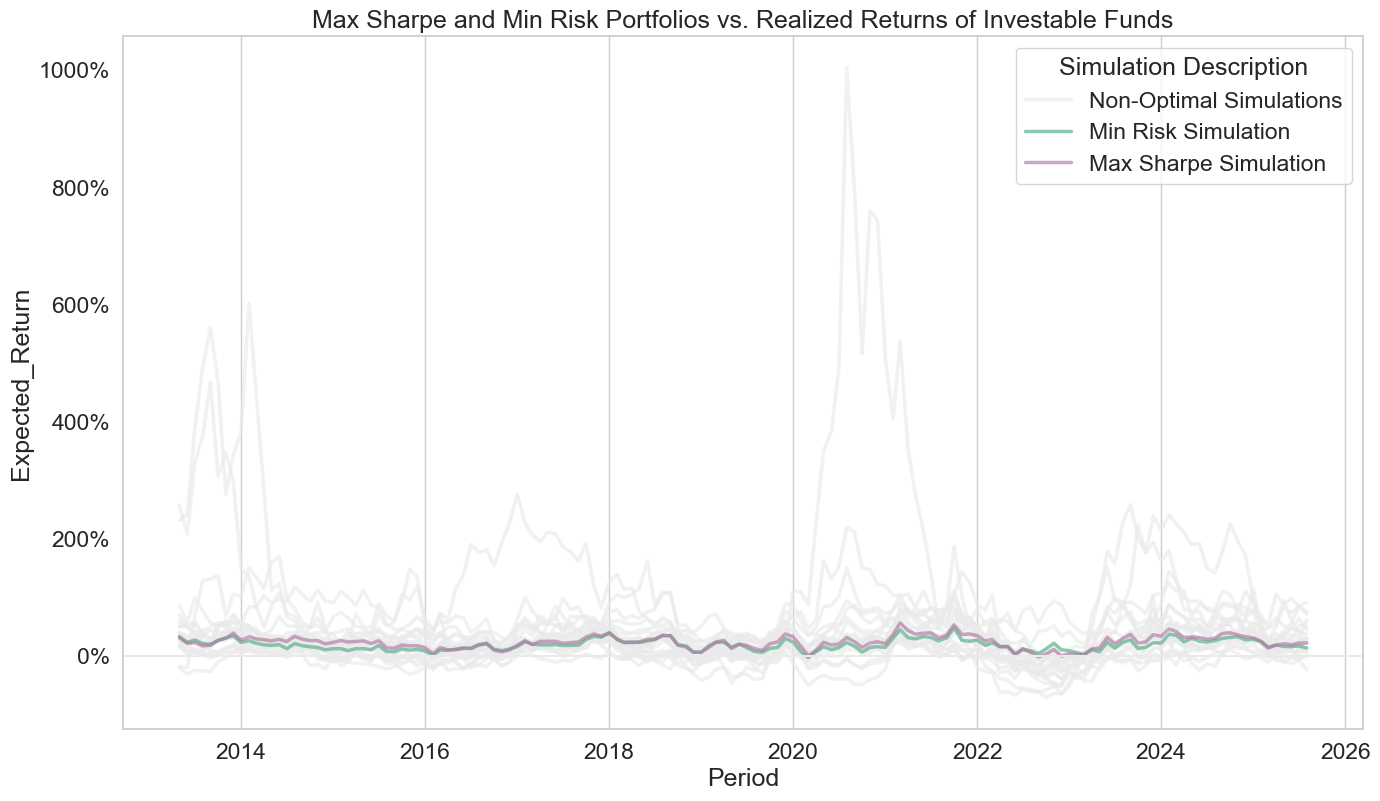

In [8]:
simulationViewer.plotOptimalVsRealizedReturns()

### Efficient Frontier: Display all Simulated Portfolios

In [9]:
simulationViewer.plotRiskVsReturnVsSharpe(TRANSPARENCY_LEVEL=0.33)

### Save all Relevant Data and Plots

In [10]:
simulationViewer.exportSimulationData()

Input_Parameters saved to:		 Output_Data/2025-08-29 10_44/Input_Parameters.csv
All_Simulated_Weights saved to:		 Output_Data/2025-08-29 10_44/All_Simulated_Weights.csv
All_Simulated_Weights_Stats saved to:		 Output_Data/2025-08-29 10_44/All_Simulated_Weights_Stats.csv
Min_Risk_Portfolio saved to:		 Output_Data/2025-08-29 10_44/Min_Risk_Portfolio.csv
Max_Sharpe_Portfolio saved to:		 Output_Data/2025-08-29 10_44/Max_Sharpe_Portfolio.csv
Expected_Returns saved to:		 Output_Data/2025-08-29 10_44/Expected_Returns.csv
Expected_Returns_Stats saved to:		 Output_Data/2025-08-29 10_44/Expected_Returns_Stats.csv
